### Last week
 - SVM as a regressor

### This week
- Decision tree
- Random Forest

## Today 
### A short comparison when to use Decision Tree and when to use Random Forest

- Importantly why?

## What is Decision Tree?

- An ensemble model (will explain later)
- Model in structure of a tree along with decision nodes and leaf nodes

<figure>
    <img
    src="misc/decision_tree.jpg">
    <center><figcaption>Decision Tree</figcaption></center>
</figure>

- Simple explaination of above:
    - What activity to do on a particular day.

## What is Random Forest?

- An ensemble modelling technique
- Multiple decision tree together
- Randomly created decision trees
- Each node in decision tree works on a random subset of features to calculate the output.
- Bootstrapping is used for randomly selecting items from the training data. Its a haphazard technique.
- Once assembling the ranomdized decision then final decision is based on majority voting

<figure>
    <img
    src="misc/random_forest.png">
    <figcaption>Random Forest Working</figcaption>
</figure>

## Other important topics

### Ensemble models
- Combines the predictions of multiple individual models(weak learners) to produce more accurate and robust predictions.
- Good with complex or noisy data

### Gini Impurity Index or Information Gain
- Evaluate the impurity or randomness of a set of instances within a node


## Binary classification problem 

### Should a person given loan or not based on certain features

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report

In [2]:
df_train = pd.read_csv('datasets/loan_data/train.csv')

In [3]:
df_train.shape

(614, 13)

In [4]:
df_train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Data Preprocessing

In [7]:
df_train['Gender'] = df_train['Gender'].map({'Male': 1, 'Female':0})
df_train['Married'] = df_train['Married'].map({'Yes': 1, 'No':0})
df_train['Education'] = df_train['Education'].map({'Graduate': 1, 'Not Graduate':0})
df_train['Dependents'].replace('3+',3,inplace=True)
df_train['Self_Employed'] = df_train['Self_Employed'].map({'Yes':1, 'No':0})
df_train['Property_Area'] = df_train['Property_Area'].map({'Semiurban':1, 'Urban':2, 'Rural':3})
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y':1, 'N':0})

# removing null vals
df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].mode()[0])
df_train['Married'] = df_train['Married'].fillna(df_train['Married'].mode()[0])
df_train['Dependents'] = df_train['Dependents'].fillna(df_train['Dependents'].mode()[0])
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0])
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0])

df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean())
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mean())
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,3,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1


In [8]:
# get value counts for each columns
def val_counts(df,cols_null):
    for col_name in cols_null:
        print(df[col_name].value_counts())

cols_null = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
val_counts(df_train,cols_null)

Gender
1.0    502
0.0    112
Name: count, dtype: int64
Married
1.0    401
0.0    213
Name: count, dtype: int64
Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64
Self_Employed
0.0    532
1.0     82
Name: count, dtype: int64
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


In [9]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,3,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 62.5+ KB


- Data looks good for modelling

In [11]:
x = df_train.drop(columns=['Loan_ID', 'Loan_Status']).values
y = df_train['Loan_Status'].values

x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape)

(491, 11) (491,) (123, 11) (123,)


## Modelling

In [12]:
# decision tree
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(x_train,y_train)

y_pred_train = dt.predict(x_train)
y_pred_valid = dt.predict(x_valid)

print('Training set f1-score: ', f1_score(y_train,y_pred_train))
print('Validation set f1-score: ', f1_score(y_valid,y_pred_valid))

print('Training confusion metrix: \n', classification_report(y_train,y_pred_train))
print('Validation confusion metrix: \n', classification_report(y_valid,y_pred_valid))

Training set f1-score:  1.0
Validation set f1-score:  0.8045977011494252
Training confusion metrix: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       342

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491

Validation confusion metrix: 
               precision    recall  f1-score   support

           0       0.66      0.44      0.53        43
           1       0.74      0.88      0.80        80

    accuracy                           0.72       123
   macro avg       0.70      0.66      0.67       123
weighted avg       0.71      0.72      0.71       123



In [13]:
# Random forest
rnd_frc = RandomForestClassifier(criterion='entropy',random_state=42)
rnd_frc.fit(x_train, y_train)

y_pred_rnd_train = rnd_frc.predict(x_train)
y_pred_rnd_valid = rnd_frc.predict(x_valid)

print('Training set f1-score: ', f1_score(y_train,y_pred_rnd_train))
print('Validation set f1-score: ', f1_score(y_valid,y_pred_rnd_valid))

print('Training confusion metrix: \n', classification_report(y_train,y_pred_rnd_train))
print('Validation confusion metrix: \n', classification_report(y_valid,y_pred_rnd_valid))

Training set f1-score:  1.0
Validation set f1-score:  0.8524590163934427
Training confusion metrix: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       342

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491

Validation confusion metrix: 
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



## Why Random forest better than Decision tree?

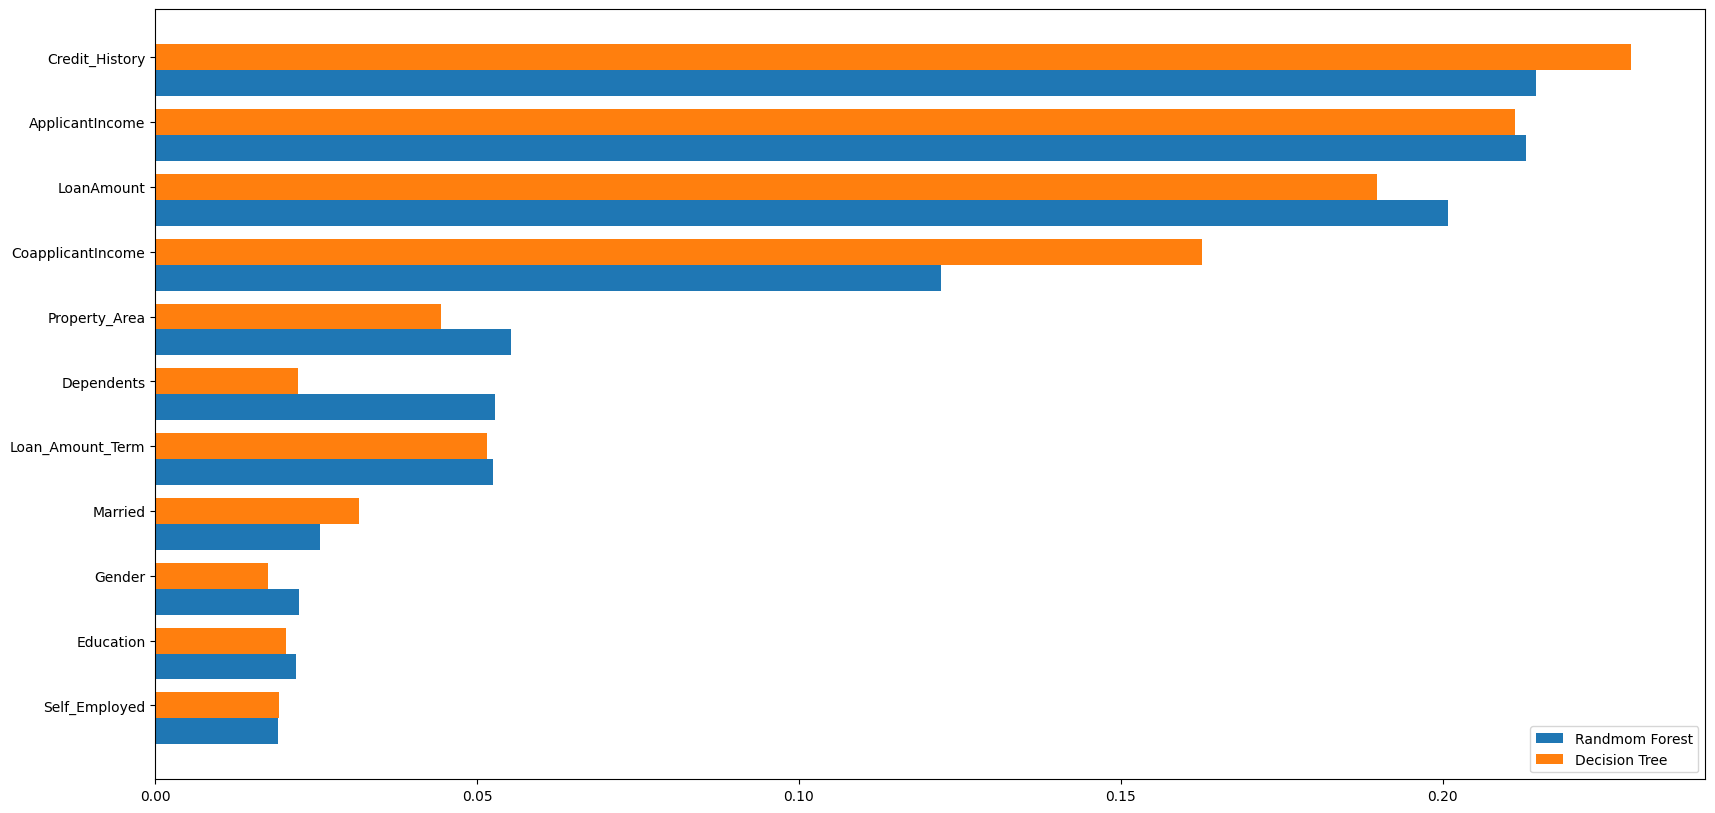

In [14]:
feature_imp = pd.DataFrame({
    'rnd_frc': rnd_frc.feature_importances_, 
    'dt': dt.feature_importances_}, 
    index=df_train.drop(['Loan_ID', 'Loan_Status'],axis=1).columns)
feature_imp.sort_values(by='rnd_frc', ascending=True, inplace=True)

index = np.arange(len(feature_imp))
fig, ax = plt.subplots(figsize=(20,10))
rfc_feature = ax.barh(index, feature_imp['rnd_frc'],0.4, label='Randmom Forest')
dt_feature = ax.barh(index+0.4, feature_imp['dt'],0.4, label='Decision Tree')
ax.set(yticks=index+0.4, yticklabels=feature_imp.index)
ax.legend()
plt.show()

## Conclusion
- Random Forest performs better here with comparison to decision tree
- Decision Tree gives importance to a particular set of features 
- Random Forest is suitable for situations when we have a large dataset, and interpretability is not a major concern.